# 6.1 Support Vector Machines

Solutions to Andrew Ng Machine Learning course using Python Jupyter Notebook by Alek Zdziarski

In [1]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Loading and Visualizing Data

In [2]:
# Load Training Data
print('Loading and Visualizing Data ...')

# import csv data
PATH="./data/"
DATA="ex6data1.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']
y = mat['y']

Loading and Visualizing Data ...


In [3]:
def plot_data(X, y):
#PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.
#
# Note: This was slightly modified such that it expects y = 1 or y = 0

    # Find Indices of Positive and Negative Examples
    pos = np.where(y==1)
    neg = np.where(y==0)

    # Plot Examples
    plt.plot(X[pos[0], 0], X[pos[0], 1], 'k+',linewidth=1, markersize=7)
    plt.plot(X[neg[0], 0], X[neg[0], 1], 'ko', markerfacecolor='y', markersize=7)

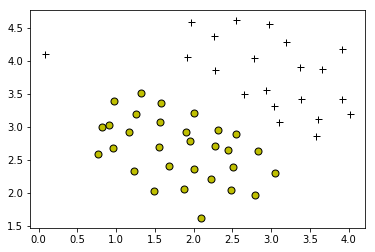

In [4]:
# Plot training data
plot_data(X, y)

## Part 2: Training Linear SVM 

In [5]:
def linear_kernel(x1, x2):
#LINEARKERNEL returns a linear kernel between x1 and x2
#   sim = linearKernel(x1, x2) returns a linear kernel between x1 and x2
#   and returns the value in sim
    
    def makecolumnar(x):
        x = x.ravel()
        x = x.reshape((x.size,1))
        return x
        
    # Ensure that x1 and x2 are column vectors
    x1 = makecolumnar(x1)
    x1 = makecolumnar(x2)

    # Compute the kernel
    return x1.T @ x2  # dot product

In [6]:
from sklearn import svm

In [17]:
def visualize_boundary_linear(X, y, clf):
#VISUALIZEBOUNDARYLINEAR plots a linear decision boundary learned by the
#SVM
#   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a linear decision boundary 
#   learned by the SVM and overlays the data on it    

    #w = model.w
    #b = model.b
    
    #xp = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    ##steps = (np.max(X[:,0])-np.min(X[:,0]))/100
    ##xp = np.arange(np.min(X[:,0]), np.max(X[:,0]), steps)
    #yp = - (w[0]@xp + b)/w[1]
    plot_data(X, y)
    #plot(xp, yp, '-b') 

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-.5, 0, .5], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
    plt.show()
    
    
    

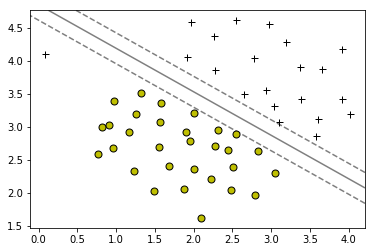

In [18]:
C = 1
#clf = svm.SVC(C, kernel=linear_kernel, tol=1e-3, max_iter=20)
clf = svm.SVC(C, kernel='linear', tol=1e-3, max_iter=50) # note using svm built in linear kernel
clf.fit(X, y.ravel())  
visualize_boundary_linear(X,y,clf)


##  Part 3: Implementing Gaussian Kernel

In [21]:
def gaussianKernel(x1, x2, sigma):
#RBFKERNEL returns a radial basis function kernel between x1 and x2
#   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
#   and returns the value in sim

    #3 Ensure that x1 and x2 are column vectors
    x1 = x1.ravel()
    x2 = x2.ravel()

    return np.exp(np.sum((x1 - x2)**2)/(-2*sigma**2))

In [27]:
x1 = np.matrix('[1 2 1]').A
x2 = np.matrix('[0 4 -1]').A
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print(f'Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {sigma} :\n\t{sim:.6f}\n(for sigma = 2, this value should be about 0.324652)\n')


Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :
	0.324652
(for sigma = 2, this value should be about 0.324652)



## Part 4: Visualizing Dataset 2

In [54]:
# import csv data
PATH="./data/"
DATA="ex6data2.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']
y = mat['y']

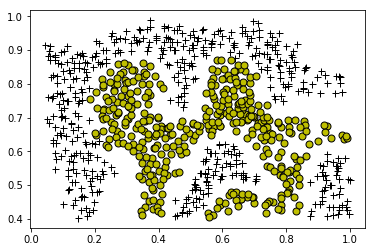

In [55]:
plot_data(X,y)

## Part 5: Training SVM with RBF Kernel (Dataset 2)

In [85]:
def visualize_boundary(X, y, clf):
#VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
#   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
#   boundary learned by the SVM and overlays the data on it

    # Plot the training data on top of the boundary
    plot_data(X, y)
    
    # Make classification predictions over a grid of values
    x1plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]),100).T
    x2plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]),100).T
    
    X1, X2 = np.meshgrid(x1plot, x2plot)
    #print(f'X1 {X1.shape} X2 {X2.shape}')
    vals = np.zeros(X1.shape)
    #print (f'vals shape {vals.shape}')
    for i in np.arange(X1.shape[1]):
        this_X = np.c_[X1[:, i], X2[:, i]]
        #print(clf.predict(this_X).reshape(100,1).shape)
        vals[:, i] = clf.predict(this_X) #svmPredict(model, this_X)
    
    
    # plot the decision function
    ax = plt.gca()
    #xlim = ax.get_xlim()
    #ylim = ax.get_ylim()

    # create grid to evaluate model
    #xx = np.linspace(xlim[0], xlim[1], 100)
    #yy = np.linspace(ylim[0], ylim[1], 100)
    #YY, XX = np.meshgrid(yy, xx)
    #xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    #Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(X1, X2, vals, colors='b', levels=[-.5, .5])
    
    
    
    # Plot the SVM boundary
    #contour(X1, X2, vals, [0.5 0.5], 'b');
    plt.show()


X1 (100, 100) X2 (100, 100)
vals shape (100, 100)


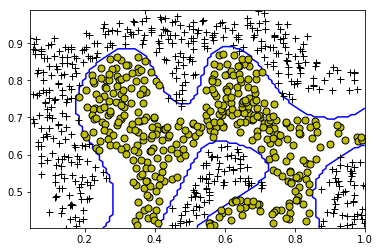

In [101]:
# SVM Parameters
C = 1000
sigma = .1 #seems to be rlated to svm library gamma = 1/sigma as get equivalent plot

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.
#model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));

clf = svm.SVC(C, kernel='rbf', tol=1e-3, max_iter=100000, gamma=1/sigma) # note using svm built in 
clf.fit(X, y.ravel())  
visualize_boundary(X, y, clf)

## Part 6: Visualizing Dataset 3

Loading and Visualizing Data ...


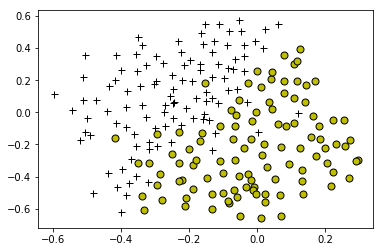

In [104]:
# Load Training Data
print('Loading and Visualizing Data ...')

# import csv data
PATH="./data/"
DATA="ex6data3.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']
y = mat['y']
Xval = mat['Xval']
yval = mat['yval']

plot_data(X, y)

## Part 7: Training SVM with RBF Kernel (Dataset 3)

In [193]:
def dataset3Params(X, y, Xval, yval):
#DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
#where you select the optimal (C, sigma) learning parameters to use for SVM
#with RBF kernel
#   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and
#   sigma. You should complete this function to return the optimal C and
#   sigma based on a cross-validation set.

    Cs = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    sigmas = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

    error = np.matrix('[0, 0, 0]').A # dummy row will delete this row as its a convenience

    for C in Cs:
        for sigma in sigmas:
            
            clf = svm.SVC(C, kernel='rbf', tol=1e-3, max_iter=10000, gamma=1/sigma) # note using svm built in 
            clf.fit(X, y.ravel())  

            
            #model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
            
            pred = clf.predict(Xval).reshape(200,1)
            
            #print (f'C {C}, sig {sigma}, pred {pred.shape} yval {yval.shape}')
            #print (f'yval {yval.shape} yval')
            error = np.r_[error, np.matrix([C, sigma, np.sum(pred!=yval)]).A]

    error = error[1:,:] # get rid of dummy row
    print(error.shape)
    #print(error)

    min_err, min_idx = np.min(error[:,2]), np.argmin(error[:,2])

    C = error[min_idx,0]
    sigma = error[min_idx,1]
    
    print (f'C {C}, sigma {sigma}, min_err {min_err} min_idx {min_idx} error.shape {error.shape}')

    return C, sigma



(64, 3)
C 0.3, sigma 0.01, min_err 7.0 min_idx 24 error.shape (64, 3)
X1 (100, 100) X2 (100, 100)
vals shape (100, 100)


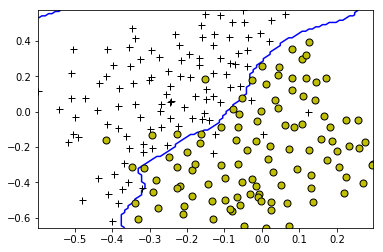

In [194]:
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
clf = svm.SVC(C, kernel='rbf', tol=1e-3, max_iter=100000, gamma=1/sigma) # note using svm built in 
clf.fit(X, y.ravel())  
visualize_boundary(X, y, clf)

X1 (100, 100) X2 (100, 100)
vals shape (100, 100)


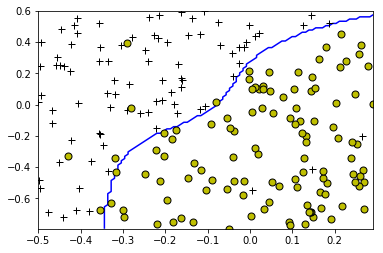

In [197]:
visualize_boundary(Xval,yval,clf)

In [195]:
sigma, C

(0.01, 0.29999999999999999)

X1 (100, 100) X2 (100, 100)
vals shape (100, 100)


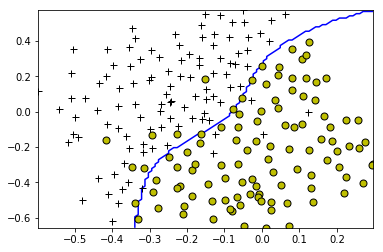

In [196]:
sigma, C = 0.1, 1 # this was Andrew's solution. clearly the fit seems better above. 
clf = svm.SVC(C, kernel='rbf', tol=1e-3, max_iter=100000, gamma=1/sigma) # note using svm built in 
clf.fit(X, y.ravel())  
visualize_boundary(X, y, clf)